In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import math
from sklearn.metrics import mean_absolute_error

In [2]:
data = pd.read_csv('marketing_customer_analysis.csv')

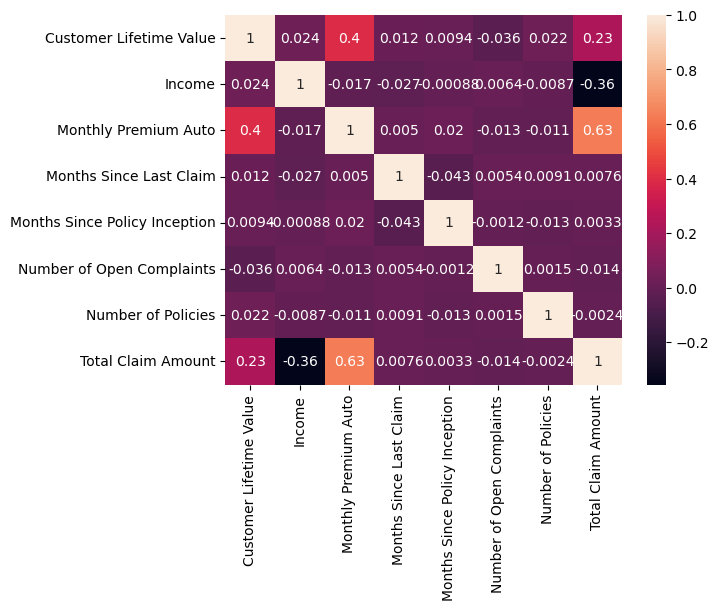

In [27]:
#multicollinearity
sns.heatmap(data.corr(),annot=True)
plt.show()

In [28]:
#remove insignificant variables
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [29]:
data  = data.drop(['Months Since Last Claim','Number of Open Complaints', 'Number of Policies'],axis=1)

In [35]:
data  = data.drop(['Customer','Response','Coverage','Effective To Date','Gender'],axis=1)

In [41]:
data.columns

Index(['State', 'Customer Lifetime Value', 'Education', 'EmploymentStatus',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Policy Inception', 'Policy Type', 'Policy',
       'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [ ]:
data  = data.drop(['Customer','Response','Coverage','Effective To Date','Gender'],axis=1)

In [42]:
data.columns

Index(['State', 'Customer Lifetime Value', 'Education', 'EmploymentStatus',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Policy Inception', 'Policy Type', 'Policy',
       'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size'],
      dtype='object')

In [43]:
data  = data.drop(['Vehicle Class', 'Vehicle Size'],axis=1)

In [98]:
num = data._get_numeric_data()

In [45]:
cat = data.select_dtypes('object')

In [46]:
num.head()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Policy Inception,Total Claim Amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879


In [47]:
cat.head()

,State,Education,EmploymentStatus,Location Code,Marital Status,Policy Type,Policy,Renew Offer Type,Sales Channel
0,Washington,Bachelor,Employed,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent
1,Arizona,Bachelor,Unemployed,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent
2,Nevada,Bachelor,Employed,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent
3,California,Bachelor,Unemployed,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center
4,Washington,Bachelor,Employed,Rural,Single,Personal Auto,Personal L1,Offer1,Agent


In [99]:
num
#I didn't remove 0 from Income, treaded as unemployed 

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Policy Inception,Total Claim Amount
0,2763.519279,56274,69,5,384.811147
1,6979.535903,0,94,42,1131.464935
2,12887.431650,48767,108,38,566.472247
3,7645.861827,0,106,65,529.881344
4,2813.692575,43836,73,44,138.130879
...,...,...,...,...,...
9129,23405.987980,71941,73,89,198.234764
9130,3096.511217,21604,79,28,379.200000
9131,8163.890428,0,85,37,790.784983
9132,7524.442436,21941,96,3,691.200000


In [100]:
#1 way od scaling - MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
MinMax = pd.DataFrame(MinMaxScaler().fit(num).transform(num))

In [62]:
MinMax

,0,1,2,3,4
0,0.010629,0.514064,0.033755,0.050505,0.132974
1,0.062406,0.307084,0.139241,0.424242,0.391051
2,0.134960,0.430601,0.198312,0.383838,0.195764
3,0.070589,0.307084,0.189873,0.656566,0.183117
4,0.011245,0.375778,0.050633,0.444444,0.047710
...,...,...,...,...,...
9129,0.264137,0.688250,0.050633,0.898990,0.068485
9130,0.014719,0.128602,0.075949,0.282828,0.131034
9131,0.076951,0.307084,0.101266,0.373737,0.273297
9132,0.069098,0.132349,0.147679,0.030303,0.238876


In [101]:
#2nd way of scaling -  
from sklearn.preprocessing import StandardScaler
SS = pd.DataFrame(StandardScaler().fit(num).transform(num))

In [97]:
SS

,0,1,2,3,4
0,-0.762878,0.417270,-0.703925,-1.580587,-0.169640
1,-0.149245,-0.439749,0.022691,-0.236222,2.400737
2,0.710636,0.071684,0.429596,-0.381558,0.455734
3,-0.052263,-0.439749,0.371467,0.599465,0.329769
4,-0.755575,-0.155315,-0.587666,-0.163553,-1.018843
...,...,...,...,...,...
9129,2.241590,1.138504,-0.587666,1.471486,-0.811934
9130,-0.714411,-1.178770,-0.413278,-0.744900,-0.188956
9131,0.023135,-0.439749,-0.238891,-0.417893,1.227937
9132,-0.069935,-1.163256,0.080820,-1.653256,0.885113


In [102]:
#train test split
X = num.drop(['Income'], axis=1)
Y = num['Income']

In [103]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=100)

In [104]:
model = sm.OLS(y_train,x_train).fit()

In [105]:
predictions = model.predict(x_test)

In [106]:
r2_score(y_test,predictions)

0.06989630794888069

In [107]:
mse = mean_squared_error(y_test, predictions)
print(mse)

849066615.1213169


In [108]:
rmse = math.sqrt(mse)
print(rmse)

29138.7476587673


In [109]:
mae = mean_absolute_error(y_test,predictions)
print (mae)

23622.639221516183
